# Import Dataset

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Define Libraries
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('mobil_listrik.csv')

In [ ]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_komentar    1517 non-null   object
 1   nama_akun      1516 non-null   object
 2   tanggal        1517 non-null   object
 3   text_cleaning  1515 non-null   object
 4   sentimen       1517 non-null   object
dtypes: object(5)
memory usage: 59.4+ KB


In [ ]:
df['sentimen'].unique()

array(['positif', 'negatif', 'netral'], dtype=object)

# Business Understanding

**Tujuan Penelitian**

* Memahami Persepsi Publik Terhadap Mobil Listrik:
Menilai pandangan masyarakat yang terbagi menjadi positif, negatif, dan netral berdasarkan komentar dari media sosial.

* Mengukur Perubahan Persepsi dari Waktu ke Waktu:
Mengevaluasi perubahan sentimen publik terkait kampanye pemasaran, kebijakan pemerintah, dan peluncuran produk baru.

* Menyediakan Insight bagi Pengambil Keputusan:
Memberikan rekomendasi strategi pemasaran, pengembangan produk, dan kebijakan pemerintah berdasarkan hasil analisis sentimen.

* Membangun Dasar untuk Penelitian Lebih Lanjut:
Menyediakan dasar metodologis untuk studi lanjutan terkait persepsi publik terhadap teknologi inovatif lainnya.

**Permasalahan**

* Penilaian Sentimen Publik:

Deskripsi: Permasalahan utama yang ingin dipecahkan adalah bagaimana masyarakat secara keseluruhan memandang mobil listrik—apakah mereka lebih cenderung memiliki pandangan positif, negatif, atau netral. Memahami distribusi sentimen ini penting untuk menilai penerimaan masyarakat terhadap mobil listrik.

* Analisis Temporal Sentimen:

Deskripsi: Mengamati bagaimana sentimen terhadap mobil listrik berubah dari waktu ke waktu, terutama dalam konteks peluncuran produk baru, kampanye pemasaran, atau perubahan kebijakan. Ini akan membantu dalam menilai reaksi masyarakat terhadap inisiatif tertentu.

**Kebutuhan**

* Data sentimen diperlukan untuk **memahami persepsi publik**, dan ini bisa digunakan oleh bisnis untuk mengambil keputusan terkait pengembangan produk, strategi pemasaran, atau kebijakan harga.

* Dengan memahami persepsi masyarakat, perusahaan mobil listrik dan yang berkaitan (bekerja sama) dapat melakukan **pengambilan keputusan yang tepat** untuk memaksimalkan profit dan pemerintah dapat membuat **kebijakan dan regulasi yang tepat** terhadap penggunaan mobil listrik.

#Data Understanding

In [ ]:
df.head(3)

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_komentar    1517 non-null   object
 1   nama_akun      1516 non-null   object
 2   tanggal        1517 non-null   object
 3   text_cleaning  1515 non-null   object
 4   sentimen       1517 non-null   object
dtypes: object(5)
memory usage: 59.4+ KB


**Isi dan Variabel Data:**

* id_komentar: ID unik dari setiap komentar.
* nama_akun: Nama akun pengguna yang memberikan komentar.
* tanggal: Tanggal dan waktu ketika komentar diposting.
* text_cleaning: Komentar yang telah dibersihkan dari karakter tidak relevan.
* sentimen: Kategori sentimen dari komentar (positif, negatif, dan netral).

In [ ]:
print('isnull:\n', df.isna().sum())
print('duplicates:', df.duplicated().sum())

isnull:
 id_komentar      0
nama_akun        1
tanggal          0
text_cleaning    2
sentimen         0
dtype: int64
duplicates: 0


In [ ]:
df[df['text_cleaning'].isna()]

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
1422,UgyqmNp8--s6MVo7Fft4AaABAg,Jansen Gunawan,2023-03-16 04:17:35+00:00,NaN,netral
1423,UgxstQlQ7hpqGWJm3xt4AaABAg,Hidayati Christen,2023-03-16 03:42:02+00:00,NaN,netral


**Format dan Kelengkapan Data:**

* Data memiliki 5 kolom dan 1517 baris/entri
* Terdapat data kosong (null) pada kolom **nama_akun** sebanyak 1 dan **text_cleaning** sebanyak 2
* Semua kolom bertipe data object. Kolom tanggal perlu diformat ulang ke tipe datetime untuk dapat analisis lebih lanjut.



**Kualitas Data:**

* Data text banyak yang **tidak baku dalam bahasa indonesia** seperti banyak singkatan dan kata-kata alay, sehingga data harus dipreprocess terlebih dahulu supaya menjadi baku agar menghasilkan hasil yang akurat.

* Ada 3 **nilai kosong (null) dan duplikasi data**, sehingga harus dilakukan penanganan terlebih dahulu.

* Format **tanggal harus dikonversi** dari object ke datetime agar analisis waktu dapat dilakukan dengan akurat.

#Data Preparation

In [ ]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id_komentar    1517 non-null   object             
 1   nama_akun      1516 non-null   object             
 2   tanggal        1517 non-null   datetime64[ns, UTC]
 3   text_cleaning  1515 non-null   object             
 4   sentimen       1517 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 59.4+ KB


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Berikutnya dilakukan pembersihan data text untuk mengambil teks yang berinformasi penting saja. Pembersihan teks dilakukan dengan sebagai berikut.

* **Lowercase**: Mengubah semua huruf menjadi huruf kecil.
* **Remove Punctuation**: Menghapus tanda baca.
* **Remove Numbers**: Menghapus angka.
* **Tokenization**: Memecah teks menjadi kata-kata.
* **Remove Stopwords**: Menghapus kata-kata umum yang tidak signifikan (seperti "dan", "adalah").
* **Lemmatization**: Mengubah kata ke bentuk dasarnya (misalnya, "berlari" menjadi "lari").

##Remove Emoticons

In [ ]:
import re
import pandas as pd

# Assuming 'df' is your DataFrame with a column 'text_cleaning'
# Convert 'text_cleaning' column to string if not already in string format
df['text_cleaning'] = df['text_cleaning'].astype(str)

# Load the abusive words and alay dictionary from the uploaded files
df_kamus_alay = pd.read_csv('new_kamusalay.csv', encoding='ISO-8859-1', names=['alay', 'normal'])

# Create the alay dictionary
kamus_alay = {str(k).strip(): str(v).strip() for k, v in zip(df_kamus_alay['alay'], df_kamus_alay['normal'])}

def clean_text(text):
    # Check if the input is None or not a string
    if not isinstance(text, str):
        print(f"Error: Expected a string but got {type(text).__name__}")
        return text  # Return the input as-is if it's not a string

    # Convert alay words to normal words
    for alay, normal in kamus_alay.items():
        text = re.sub(r'\b' + re.escape(alay) + r'\b', normal, text, flags=re.IGNORECASE)

    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    return text

# Apply the clean_text function to each element in the 'text_cleaning' column
df['text_cleaning_cleaned'] = df['text_cleaning'].apply(clean_text)

FileNotFoundError: [Errno 2] No such file or directory: 'new_kamusalay.csv'

In [ ]:
df = df[[col for col in df.columns if col != 'sentimen'] + ['sentimen']]

In [ ]:
df.head()

##Tokenize & Remove Stopwords

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Pastikan untuk mengunduh stopwords dan punkt jika belum dilakukan
nltk.download('stopwords')
nltk.download('punkt')

# Dictionary more_dict berisi stopwords dan kata-kata redundant
more_dict = {
    "general_stopwords": [
        "sih", "insya", "allah", "teh", "oi", "ari", "iraha", "ya",
        "wewenang", "pnp", "oi", "kayak", "nih", "loh", "deh", "was",
        "goyang", "iya", "dong", "gusti", "banget", "loh", "dong",
        "woi", "nah", "loh", "nih", "loh"
    ]
}

# Fungsi untuk menghapus karakter non-alfabetik
def clean_text(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Fungsi untuk mengubah teks menjadi huruf kecil
def to_lowercase(text):
    if not isinstance(text, str):
        return text
    return text.lower()

# Fungsi untuk menghapus stopwords, kata-kata redundant, dan melakukan tokenisasi
def preprocess_text(text):
    if not isinstance(text, str):
        return text

    # Tokenisasi
    tokens = word_tokenize(text)

    # Menggabungkan stopwords dari NLTK dan more_dict
    stop_words = set(stopwords.words('indonesian'))
    custom_stop_words = set(more_dict["general_stopwords"])

    # Menghapus stopwords dan kata-kata redundant
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.lower() not in custom_stop_words]

    return ' '.join(filtered_tokens)

# Langkah-langkah pembersihan teks dalam urutan yang benar
text_cleaning_steps = {
    'text_cleaning_initial': ['text_cleaning_cleaned'],
    'text_cleaning_cleaned': [clean_text, to_lowercase, preprocess_text]
}

# Terapkan langkah-langkah pembersihan teks ke DataFrame
for new_column, steps in text_cleaning_steps.items():
    if len(steps) == 1:  # Salin kolom asli ke kolom baru
        df[new_column] = df[steps[0]]
    else:  # Terapkan fungsi pembersihan secara berurutan
        df[new_column] = df['text_cleaning_cleaned']
        for step in steps:
            df[new_column] = df[new_column].apply(step)

# Tampilkan DataFrame hasil pembersihan
print(df)


Teks sudah dibersihkan

Setelah itu dilakukan stemming kata dengan menggunakan sastrawi

##Stemming - Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemming process
def stemming(text):
  text = stemmer.stem(text)
  return text

df['text_cleaning_cleaned'] = df['text_cleaning_cleaned'].apply(stemming)

In [ ]:
df['text_cleaning_cleaned'].head()

In [ ]:
df.head()

##Call Ready to Process csv

In [ ]:
df = pd.read_csv('df_ready_to_process.csv')

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
id_komentar,0
nama_akun,1
tanggal,0
text_cleaning,2
text_cleaning_cleaned,3
sentimen,0
text_cleaning_initial,2


In [ ]:
df = df.dropna()

##TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_cleaning_cleaned'])

# Count Vectorization
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['text_cleaning_cleaned'])


In [ ]:
print(tfidf_matrix)

  (0, 1652)	0.39130125581184805
  (0, 1500)	0.3485936680963921
  (0, 399)	0.4211533798261171
  (0, 1079)	0.5038942346274959
  (0, 958)	0.17165043104413638
  (0, 338)	0.2953847878899353
  (0, 2462)	0.4211533798261171
  (1, 878)	0.3130588188652883
  (1, 1044)	0.36920807843124137
  (1, 555)	0.30767392102398883
  (1, 460)	0.2608429810531164
  (1, 2966)	0.20607513689393275
  (1, 1899)	0.2983556014289082
  (1, 682)	0.38993109949602783
  (1, 1434)	0.25883843948197194
  (1, 2670)	0.3138350742191698
  (1, 2248)	0.36920807843124137
  (1, 958)	0.1328291468853312
  (2, 1150)	0.34934809886156115
  (2, 2051)	0.4110878589236787
  (2, 1839)	0.4359293829396435
  (2, 1267)	0.3353019952454169
  (2, 1434)	0.6375741706983296
  (3, 550)	0.5523001847428567
  (3, 1616)	0.2116975872361511
  :	:
  (1509, 81)	0.30453554747011913
  (1510, 771)	0.5386104078409479
  (1510, 2615)	0.5957763122873414
  (1510, 202)	0.5957763122873414
  (1511, 483)	0.4183525753186917
  (1511, 1111)	0.34030698116251473
  (1511, 2103)	0.3

In [ ]:
df['text_cleaning_cleaned'].unique()

array(['saran bikin harga ionic brio laris manis',
       'problem subsidi kualitas diturunin harga naik usaha cari cuan subsidi inflasi gede',
       'kualitas kembang kualitas motor motor pabrikan jepang', ...,
       'esemka bangga solo',
       'cerdas orang pasar jalan x kota ngecas jam harga bahan bakar minyak naik',
       'niat beli ev murah naik perintah rakyat kasih sejahtera'],
      dtype=object)

Data sudah bersih dan siap dilakukan EDA

#Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,Unnamed: 0,id_komentar,nama_akun,tanggal,text_cleaning,text_cleaning_cleaned,sentimen,text_cleaning_initial
0,0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,saran bikin harga ionic brio laris manis,positif,saran sih bikin harga ionic sama kayak brio ...
1,1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,problem subsidi kualitas diturunin harga naik ...,negatif,problem subsidi kualitas diturunin harga dinai...
2,2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,kualitas kembang kualitas motor motor pabrikan...,positif,baik kualitas kembang dulu baik kualitas motor...
3,3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,model jelek kualitas buruk harga mahal crot,negatif,model jelek kualitas buruk harga mahal crot
4,4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,syarat kacau anak muda rumah usaha mikro tenga...,negatif,syarat kacau oi anak muda belum punya ruma...


#Pickle

In [ ]:
# prompt: save tf idf using pickle

import pickle

# Save the TF-IDF model
with open('tfidf_model.pkl', 'wb') as f:
  pickle.dump(tfidf_vectorizer, f)

# Save the TF-IDF matrix
with open('tfidf_matrix.pkl', 'wb') as f:
  pickle.dump(tfidf_matrix, f)


In [ ]:
import pickle

# Load the TF-IDF model
with open('tfidf_model.pkl', 'rb') as f:
  tfidf_vectorizer = pickle.load(f)

# Load the TF-IDF matrix
with open('tfidf_matrix.pkl', 'rb') as f:
  tfidf_matrix = pickle.load(f)


In [ ]:
print(tfidf_matrix)

  (0, 1652)	0.39130125581184805
  (0, 1500)	0.3485936680963921
  (0, 399)	0.4211533798261171
  (0, 1079)	0.5038942346274959
  (0, 958)	0.17165043104413638
  (0, 338)	0.2953847878899353
  (0, 2462)	0.4211533798261171
  (1, 878)	0.3130588188652883
  (1, 1044)	0.36920807843124137
  (1, 555)	0.30767392102398883
  (1, 460)	0.2608429810531164
  (1, 2966)	0.20607513689393275
  (1, 1899)	0.2983556014289082
  (1, 682)	0.38993109949602783
  (1, 1434)	0.25883843948197194
  (1, 2670)	0.3138350742191698
  (1, 2248)	0.36920807843124137
  (1, 958)	0.1328291468853312
  (2, 1150)	0.34934809886156115
  (2, 2051)	0.4110878589236787
  (2, 1839)	0.4359293829396435
  (2, 1267)	0.3353019952454169
  (2, 1434)	0.6375741706983296
  (3, 550)	0.5523001847428567
  (3, 1616)	0.2116975872361511
  :	:
  (1509, 81)	0.30453554747011913
  (1510, 771)	0.5386104078409479
  (1510, 2615)	0.5957763122873414
  (1510, 202)	0.5957763122873414
  (1511, 483)	0.4183525753186917
  (1511, 1111)	0.34030698116251473
  (1511, 2103)	0.3

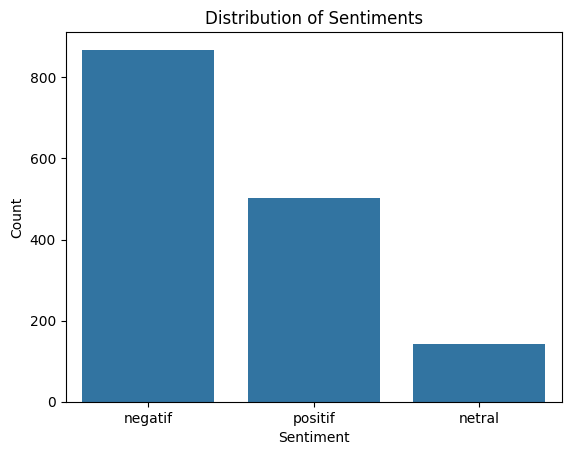

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = df['sentimen'].value_counts()
plot = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

Nilai antar label jomplang *(imbalance data)*, sehingga harus ditangani dengan **SMOTE atau Undersampling**

In [ ]:
# Calculate value counts for each 'nama_akun'
df['user_counts'] = df['nama_akun'].map(df['nama_akun'].value_counts())

# Filter rows where 'user_counts' > 0
df[df['user_counts'] > 1]

,Unnamed: 0,id_komentar,nama_akun,tanggal,text_cleaning,text_cleaning_cleaned,sentimen,text_cleaning_initial,user_counts
976,976,UgzrIme6uSs4MNMLKPF4AaABAg,Albert,2023-06-07 03:03:23+00:00,title berita tak laku at the same time tampil ...,title berita laku at the time tampil data jual...,negatif,title berita tak laku at the sama time tampil ...,2
1420,1420,UgzdMErvwsK1yxsHxZd4AaABAg,Albert,2023-03-16 07:40:11+00:00,suka banget kak shania bawain berita si cantik...,suka kak shania bawain berita cantik cerdas,negatif,suka banget kak shania bawain berita sih canti...,2


Tidak ada anomali seperti bot yang berkomentar, karena tidak ada akun yang komen banyak, hanya 2 kali saja

Mencari kata yang paling banyak muncul

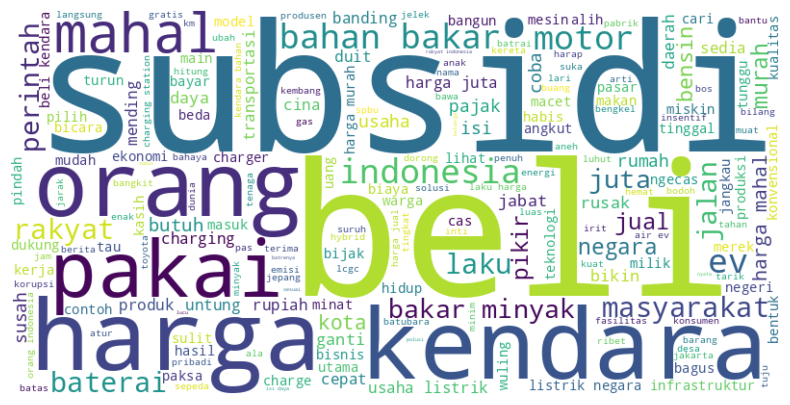

In [ ]:
from wordcloud import WordCloud

# Combine all text into a single string
all_text = ' '.join(df['text_cleaning_cleaned'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dapat dilhat bahwa kata yang paling banyak muncul adalah subsidi, beli, harga, kendara, mahal, ev, dan lainnya

##Data Preprocessing

In [ ]:
df['sentimen_code'] = df['sentimen'].map({'negatif': 0, 'netral': 1, 'positif': 2})
df.head()

,Unnamed: 0,id_komentar,nama_akun,tanggal,text_cleaning,text_cleaning_cleaned,sentimen,text_cleaning_initial,user_counts,sentimen_code
0,0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,saran bikin harga ionic brio laris manis,positif,saran sih bikin harga ionic sama kayak brio ...,1,2
1,1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,problem subsidi kualitas diturunin harga naik ...,negatif,problem subsidi kualitas diturunin harga dinai...,1,0
2,2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,kualitas kembang kualitas motor motor pabrikan...,positif,baik kualitas kembang dulu baik kualitas motor...,1,2
3,3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,model jelek kualitas buruk harga mahal crot,negatif,model jelek kualitas buruk harga mahal crot,1,0
4,4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,syarat kacau anak muda rumah usaha mikro tenga...,negatif,syarat kacau oi anak muda belum punya ruma...,1,0


In [ ]:
# df_preprocessed = df.copy()
# df_preprocessed = df_preprocessed.drop(columns=['id_komentar', 'nama_akun', 'tanggal', 'text_cleaning', 'user_counts'])

X = tfidf_matrix
y = df['sentimen_code']

# df_preprocessed.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.35, random_state=42)

Mengatasi imbalance data dengan SMOTE pada data train

In [ ]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data pelatihan
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote

<1707x3042 sparse matrix of type '<class 'numpy.float64'>'
	with 18044 stored elements in Compressed Sparse Row format>

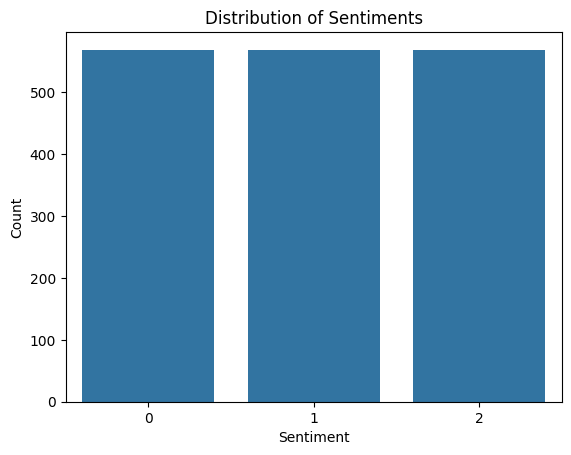

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts_smote = y_train_smote.value_counts()
plot = sns.barplot(x=sentiment_counts_smote.index, y=sentiment_counts_smote.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

Label tiap kelas sudah seimbang, maka dapat dilanjutkan dengan modeling

#Modeling & Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

# Buat dan latih model
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2,
       2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1,
       1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2,
       1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan metrik evaluasi
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {cm}')


Accuracy: 0.6509433962264151
Precision: 0.6366935750773436
Recall: 0.6509433962264151
F1-score: 0.6403426860744862
Confusion Matrix:
 [[240  17  42]
 [ 28  11  14]
 [ 71  13  94]]


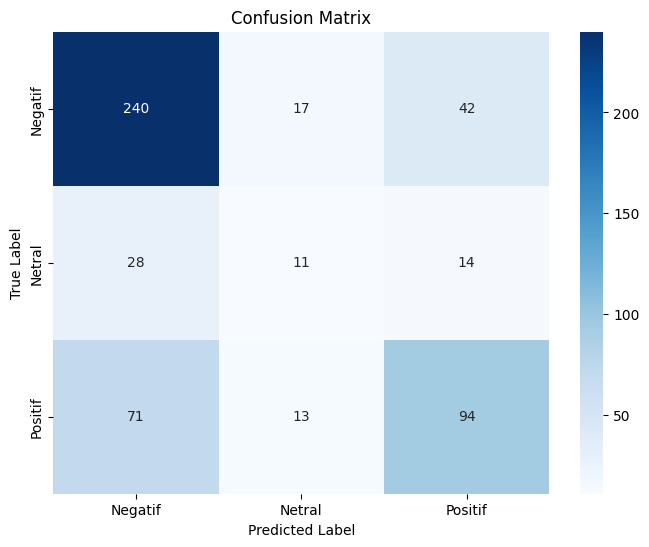

In [ ]:
# prompt: Aesthetics confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# prompt: use 5 model to compare the best model

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Support Vector Machine', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier())
]

# Train and evaluate each model
results = []
for name, model in models:
  model.fit(X_train_smote, y_train_smote)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  results.append([name, accuracy, precision, recall, f1])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Print the results
print(results_df)

                     Model  Accuracy  Precision    Recall  F1-score
0      Logistic Regression  0.650943   0.636694  0.650943  0.640343
1  Multinomial Naive Bayes  0.596226   0.621983  0.596226  0.607402
2   Support Vector Machine  0.639623   0.627908  0.639623  0.580223
3            Decision Tree  0.558491   0.556810  0.558491  0.557530
4            Random Forest  0.632075   0.599888  0.632075  0.597684
5                  XGBoost  0.641509   0.606809  0.641509  0.617100


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# # Define the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=y_train_smote.shape[1], output_dim=128))
# model.add(LSTM(64))
# model.add(Dense(3, activation='softmax'))  # 3 output units for 3 sentiment classes

# # Compile the model with a custom learning rate
# optimizer = Adam(learning_rate=0.01)  # Set a custom learning rate
# model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Train the model
# model.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32)  # Adjust epochs and batch_size

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print('Test accuracy:', accuracy)


In [ ]:
# !pip install keras-tuner -q  # Install Keras Tuner

# from kerastuner import HyperModel, RandomSearch
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# class MyLSTMHyperModel(HyperModel):
#     def build(self, hp):
#         model = Sequential()
#         model.add(Embedding(input_dim=tfidf_matrix.shape[1], output_dim=hp.Choice('embedding_dim', [64, 128, 256])))
#         model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
#                        dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
#                        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)))
#         model.add(Dense(3, activation='softmax'))

#         model.compile(
#             optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy'])
#         return model

# # Instantiate tuner
# tuner = RandomSearch(
#     MyLSTMHyperModel(),
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='lstm_tuning'
# )

# # Start tuning
# tuner.search(X_train_smote, y_train_smote, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"Optimal number of units in LSTM layer: {best_hps.get('units')}")
# print(f"Optimal dropout: {best_hps.get('dropout')}")
# print(f"Optimal recurrent_dropout: {best_hps.get('recurrent_dropout')}")
# print(f"Optimal learning_rate: {best_hps.get('learning_rate')}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.5 MB/s eta 0:00:00


<ipython-input-48-a372cc353e2a>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |embedding_dim
288               |288               |units
0.3               |0.3               |dropout
0.3               |0.3               |recurrent_dropout
0.01              |0.01              |learning_rate

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 172s 6s/step - accuracy: 0.3201 - loss: 1.1465 - val_accuracy: 0.5642 - val_loss: 0.9675
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.3121 - loss: 1.1453 - val_accuracy: 0.3358 - val_loss: 1.0254
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.3273 - loss: 1.1386 - val_accuracy: 0.3358 - val_loss: 1.0537
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 170s 6s/step - accuracy: 0.3237 - loss: 1.1202 - val_accuracy: 0.5642 - val_loss: 0.9691
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 211s 7s/step - accuracy: 0.3489 - loss: 1.1166 - val_accuracy: 0.5642 - val_loss: 1.0629
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━

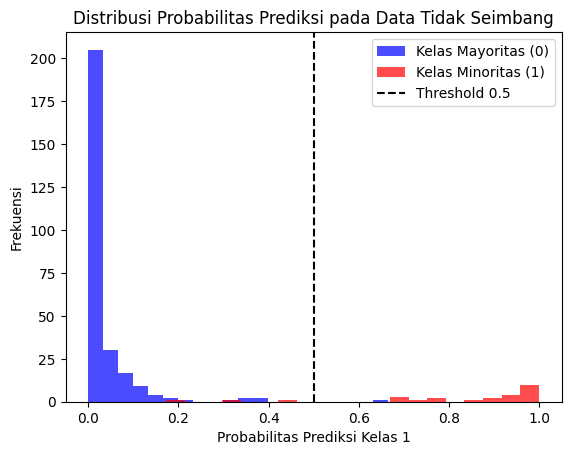

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Membuat data yang tidak seimbang
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=1)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi probabilitas
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Visualisasi distribusi probabilitas prediksi
plt.hist(y_pred_prob[y_test == 0], bins=20, color='blue', alpha=0.7, label='Kelas Mayoritas (0)')
plt.hist(y_pred_prob[y_test == 1], bins=20, color='red', alpha=0.7, label='Kelas Minoritas (1)')
plt.axvline(0.5, color='black', linestyle='--', label='Threshold 0.5')
plt.title('Distribusi Probabilitas Prediksi pada Data Tidak Seimbang')
plt.xlabel('Probabilitas Prediksi Kelas 1')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()


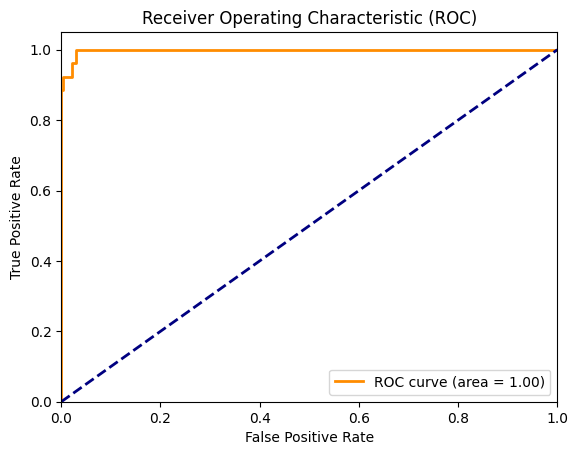

In [ ]:
# prompt: use cloglog

from sklearn.metrics import roc_curve, auc

# ... (previous code) ...

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
